In [2]:
import pandas as pd
sales_train_validation_df = pd.read_csv('./sales_train_validation.csv')
# sample_submission_df = pd.read_csv('./sample_submission.csv')
sell_prices_df = pd.read_csv('./sell_prices.csv')
calendar_df = pd.read_csv('./calendar.csv')

In [6]:
sales_train_validation_df.shape

(30490, 1919)

In [8]:
calendar_df.shape

(1969, 14)

In [10]:
sell_prices_df.shape

(6841121, 4)

In [12]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [14]:
calendar_df['date'].min()

'2011-01-29'

In [16]:
calendar_df['date'].max()

'2016-06-19'

In [18]:
sales_train_validation_df.iloc[0]

id          HOBBIES_1_001_CA_1_validation
item_id                     HOBBIES_1_001
dept_id                         HOBBIES_1
cat_id                            HOBBIES
store_id                             CA_1
                        ...              
d_1909                                  1
d_1910                                  3
d_1911                                  0
d_1912                                  1
d_1913                                  1
Name: 0, Length: 1919, dtype: object

In [20]:
d_columns = []
id_columns = []
for col in sales_train_validation_df.columns:
    if(col.startswith('d_')):
        d_columns.append(col)
    else:
        id_columns.append(col)
line_plot_df = sales_train_validation_df[d_columns]

In [22]:
x = line_plot_df.head(1)

In [24]:
x

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1


In [26]:
date_map = calendar_df.set_index('d')['date'].to_dict()

In [30]:
x_melted = pd.melt(x, var_name='metric', value_name='sales')

In [32]:
x_melted

,metric,sales
0,d_1,0
1,d_2,0
2,d_3,0
3,d_4,0
4,d_5,0
...,...,...
1908,d_1909,1
1909,d_1910,3
1910,d_1911,0
1911,d_1912,1


In [32]:
x_melted['date'] = x_melted['metric'].map(date_map)

In [36]:
x_melted

,metric,sales,date
0,d_1,0,2011-01-29
1,d_2,0,2011-01-30
2,d_3,0,2011-01-31
3,d_4,0,2011-02-01
4,d_5,0,2011-02-02
...,...,...,...
1908,d_1909,1,2016-04-20
1909,d_1910,3,2016-04-21
1910,d_1911,0,2016-04-22
1911,d_1912,1,2016-04-23


In [34]:
import matplotlib.pyplot as plt

In [36]:
# Set the 'Date' column as the index for plotting dates on the x-axis
x_melted = x_melted.set_index('date')


In [42]:
x_melted

,metric,sales
date,,
2011-01-29,d_1,0
2011-01-30,d_2,0
2011-01-31,d_3,0
2011-02-01,d_4,0
2011-02-02,d_5,0
...,...,...
2016-04-20,d_1909,1
2016-04-21,d_1910,3
2016-04-22,d_1911,0


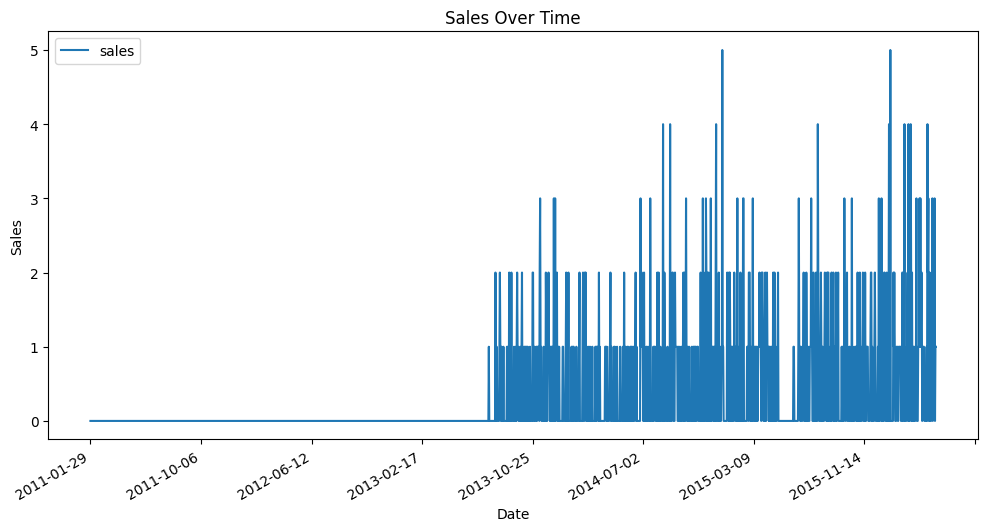

In [38]:
x_melted.plot(y='sales', kind='line', figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.gcf().autofmt_xdate()

plt.show()

In [40]:
sales_melted = pd.melt(sales_train_validation_df, id_vars = id_columns, value_vars = d_columns, var_name = 'd', value_name = 'sales')

In [47]:
sales_melted

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
...,...,...,...,...,...,...,...,...
58327365,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1913,1
58327366,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1913,0
58327367,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1913,0
58327368,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1913,3


In [41]:
calendar_merged = pd.merge(sales_melted, calendar_df, on='d', how='left')

In [44]:
sales_columns = ['store_id', 'item_id', 'wm_yr_wk', 'sell_price']

In [46]:
required_sales_df = sell_prices_df[sales_columns]

In [48]:
sell_prices_merged = pd.merge(calendar_merged, required_sales_df, on = ['store_id', 'item_id', 'wm_yr_wk'], how='left')

In [54]:
sell_prices_merged

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58327365,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1913,1,2016-04-24,11613,...,4,2016,NaN,NaN,NaN,NaN,0,0,0,2.98
58327366,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1913,0,2016-04-24,11613,...,4,2016,NaN,NaN,NaN,NaN,0,0,0,2.48
58327367,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1913,0,2016-04-24,11613,...,4,2016,NaN,NaN,NaN,NaN,0,0,0,3.98
58327368,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1913,3,2016-04-24,11613,...,4,2016,NaN,NaN,NaN,NaN,0,0,0,1.28


In [50]:
sell_prices_merged['sell_price'].isna().sum()

12299413

In [52]:
sell_prices_merged['sell_price'].fillna(-1, inplace=True)

/var/folders/5j/21g__tmn49j37fc_6jm0546c0000gn/T/ipykernel_1693/1021864783.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sell_prices_merged['sell_price'].fillna(-1, inplace=True)


In [54]:
sell_prices_merged['sell_price'].isna().sum()

0

In [56]:
sell_prices_merged['price_missing'] = 0
sell_prices_merged.loc[sell_prices_merged['sell_price'] == -1, 'price_missing'] = 1

In [58]:
sell_prices_merged.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd',
       'sales', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI', 'sell_price', 'price_missing'],
      dtype='object')

In [60]:
sell_prices_merged['is_weekend'] = 0
sell_prices_merged.loc[sell_prices_merged['weekday'].isin(['Saturday','Sunday']), 'is_weekend'] = 1

In [61]:
sell_prices_merged['month'].nunique()

12

In [64]:
sell_prices_merged['quarter'] = 1
sell_prices_merged.loc[sell_prices_merged['month'].isin([4,4,6]), 'quarter'] = 2
sell_prices_merged.loc[sell_prices_merged['month'].isin([7,8,9]), 'quarter'] = 3
sell_prices_merged.loc[sell_prices_merged['month'].isin([10,11,12]), 'quarter'] = 4

In [66]:
sell_prices_merged = sell_prices_merged.rename(columns={'wm_yr_wk': 'week_number'})

In [67]:
sell_prices_merged['date'] = pd.to_datetime(sell_prices_merged['date'])
sell_prices_merged['day_of_month'] = sell_prices_merged['date'].dt.day

In [68]:
sell_prices_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58327370 entries, 0 to 58327369
Data columns (total 26 columns):
 #   Column         Dtype         
---  ------         -----         
 0   id             object        
 1   item_id        object        
 2   dept_id        object        
 3   cat_id         object        
 4   store_id       object        
 5   state_id       object        
 6   d              object        
 7   sales          int64         
 8   date           datetime64[ns]
 9   week_number    int64         
 10  weekday        object        
 11  wday           int64         
 12  month          int64         
 13  year           int64         
 14  event_name_1   object        
 15  event_type_1   object        
 16  event_name_2   object        
 17  event_type_2   object        
 18  snap_CA        int64         
 19  snap_TX        int64         
 20  snap_WI        int64         
 21  sell_price     float64       
 22  price_missing  int64         
 23  is_we

In [79]:
sell_prices_merged.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,week_number,...,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,price_missing,is_weekend,quarter,day_of_month
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,0,0,0,-1.0,1,1,1,29
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,0,0,0,-1.0,1,1,1,29
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,0,0,0,-1.0,1,1,1,29
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,0,0,0,-1.0,1,1,1,29
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,0,0,0,-1.0,1,1,1,29


In [69]:
sell_prices__merged_lags = sell_prices_merged.sort_values(by=['store_id', 'item_id', 'date'])

In [70]:
sell_prices__merged_lags['lag_7'] = sell_prices__merged_lags.groupby(['store_id', 'item_id'])['sales'].shift(7)
sell_prices__merged_lags['lag_28'] = sell_prices__merged_lags.groupby(['store_id', 'item_id'])['sales'].shift(28)


In [79]:
sell_prices__merged_lags[['sales','lag_7','lag_28']].head(50)

,sales,lag_7,lag_28
1612,3,NaN,NaN
32102,0,NaN,NaN
62592,0,NaN,NaN
93082,1,NaN,NaN
123572,4,NaN,NaN
154062,2,NaN,NaN
184552,0,NaN,NaN
215042,2,3.0,NaN
245532,0,0.0,NaN
276022,0,0.0,NaN


In [76]:
sell_prices__merged_lags['Rolling_7'] = sell_prices__merged_lags['sales'].rolling(window=7).mean()
sell_prices__merged_lags['Rolling_28'] = sell_prices__merged_lags['sales'].rolling(window=28).mean()


In [77]:
sell_prices__merged_lags[['sales','lag_7','lag_28', 'Rolling_7', 'Rolling_28']].head(50)

,sales,lag_7,lag_28,Rolling_7,Rolling_28
1612,3,NaN,NaN,NaN,NaN
32102,0,NaN,NaN,NaN,NaN
62592,0,NaN,NaN,NaN,NaN
93082,1,NaN,NaN,NaN,NaN
123572,4,NaN,NaN,NaN,NaN
154062,2,NaN,NaN,NaN,NaN
184552,0,NaN,NaN,1.428571,NaN
215042,2,3.0,NaN,1.285714,NaN
245532,0,0.0,NaN,1.285714,NaN
276022,0,0.0,NaN,1.285714,NaN


In [80]:
sell_prices__merged_lags['price_lag_7'] = sell_prices__merged_lags.groupby(['store_id', 'item_id'])['sell_price'].shift(7)

In [83]:
sell_prices__merged_lags.head(20)

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,week_number,...,sell_price,price_missing,is_weekend,quarter,day_of_month,lag_7,lag_28,Rolling_7,Rolling_28,price_lag_7
1612,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1,3,2011-01-29,11101,...,2.0,0,1,1,29,NaN,NaN,NaN,NaN,NaN
32102,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_2,0,2011-01-30,11101,...,2.0,0,1,1,30,NaN,NaN,NaN,NaN,NaN
62592,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_3,0,2011-01-31,11101,...,2.0,0,0,1,31,NaN,NaN,NaN,NaN,NaN
93082,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_4,1,2011-02-01,11101,...,2.0,0,0,1,1,NaN,NaN,NaN,NaN,NaN
123572,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_5,4,2011-02-02,11101,...,2.0,0,0,1,2,NaN,NaN,NaN,NaN,NaN
154062,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_6,2,2011-02-03,11101,...,2.0,0,0,1,3,NaN,NaN,NaN,NaN,NaN
184552,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_7,0,2011-02-04,11101,...,2.0,0,0,1,4,NaN,NaN,1.428571,NaN,NaN
215042,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_8,2,2011-02-05,11102,...,2.0,0,1,1,5,3.0,NaN,1.285714,NaN,2.0
245532,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_9,0,2011-02-06,11102,...,2.0,0,1,1,6,0.0,NaN,1.285714,NaN,2.0
276022,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_10,0,2011-02-07,11102,...,2.0,0,0,1,7,0.0,NaN,1.285714,NaN,2.0


In [81]:
import numpy as np

condition1 = (sell_prices__merged_lags['sell_price'] == -1) | (sell_prices__merged_lags['price_lag_7'] == -1)
condition2 = (sell_prices__merged_lags['sell_price'] != sell_prices__merged_lags['price_lag_7']) & (~condition1)

sell_prices__merged_lags['price_change_flag'] = np.where(condition1, 0, np.where(condition2, 1, 0))

In [104]:
sell_prices__merged_lags.head(20)

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,week_number,...,price_missing,is_weekend,quarter,day_of_month,lag_7,lag_28,Rolling_7,Rolling_28,price_lag_7,price_change_flag
1612,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1,3,2011-01-29,11101,...,0,1,1,29,NaN,NaN,NaN,NaN,NaN,1
32102,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_2,0,2011-01-30,11101,...,0,1,1,30,NaN,NaN,NaN,NaN,NaN,1
62592,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_3,0,2011-01-31,11101,...,0,0,1,31,NaN,NaN,NaN,NaN,NaN,1
93082,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_4,1,2011-02-01,11101,...,0,0,1,1,NaN,NaN,NaN,NaN,NaN,1
123572,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_5,4,2011-02-02,11101,...,0,0,1,2,NaN,NaN,NaN,NaN,NaN,1
154062,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_6,2,2011-02-03,11101,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,1
184552,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_7,0,2011-02-04,11101,...,0,0,1,4,NaN,NaN,1.428571,NaN,NaN,1
215042,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_8,2,2011-02-05,11102,...,0,1,1,5,3.0,NaN,1.285714,NaN,2.0,0
245532,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_9,0,2011-02-06,11102,...,0,1,1,6,0.0,NaN,1.285714,NaN,2.0,0
276022,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_10,0,2011-02-07,11102,...,0,0,1,7,0.0,NaN,1.285714,NaN,2.0,0


In [106]:
sell_prices__merged_lags.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58327370 entries, 1612 to 58325932
Data columns (total 32 columns):
 #   Column             Dtype         
---  ------             -----         
 0   id                 object        
 1   item_id            object        
 2   dept_id            object        
 3   cat_id             object        
 4   store_id           object        
 5   state_id           object        
 6   d                  object        
 7   sales              int64         
 8   date               datetime64[ns]
 9   week_number        int64         
 10  weekday            object        
 11  wday               int64         
 12  month              int64         
 13  year               int64         
 14  event_name_1       object        
 15  event_type_1       object        
 16  event_name_2       object        
 17  event_type_2       object        
 18  snap_CA            int64         
 19  snap_TX            int64         
 20  snap_WI            int64

In [84]:
is_not_null_1 = sell_prices__merged_lags['event_name_1'].notnull()
is_not_null_2 = sell_prices__merged_lags['event_name_2'].notnull()
sell_prices__merged_lags['is_event'] = np.where(is_not_null_1|is_not_null_2,1,0)

In [124]:
sell_prices__merged_lags.head(20)

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,week_number,...,is_weekend,quarter,day_of_month,lag_7,lag_28,Rolling_7,Rolling_28,price_lag_7,price_change_flag,is_event
1612,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1,3,2011-01-29,11101,...,1,1,29,NaN,NaN,NaN,NaN,NaN,1,0
32102,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_2,0,2011-01-30,11101,...,1,1,30,NaN,NaN,NaN,NaN,NaN,1,0
62592,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_3,0,2011-01-31,11101,...,0,1,31,NaN,NaN,NaN,NaN,NaN,1,0
93082,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_4,1,2011-02-01,11101,...,0,1,1,NaN,NaN,NaN,NaN,NaN,1,0
123572,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_5,4,2011-02-02,11101,...,0,1,2,NaN,NaN,NaN,NaN,NaN,1,0
154062,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_6,2,2011-02-03,11101,...,0,1,3,NaN,NaN,NaN,NaN,NaN,1,0
184552,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_7,0,2011-02-04,11101,...,0,1,4,NaN,NaN,1.428571,NaN,NaN,1,0
215042,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_8,2,2011-02-05,11102,...,1,1,5,3.0,NaN,1.285714,NaN,2.0,0,0
245532,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_9,0,2011-02-06,11102,...,1,1,6,0.0,NaN,1.285714,NaN,2.0,0,1
276022,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_10,0,2011-02-07,11102,...,0,1,7,0.0,NaN,1.285714,NaN,2.0,0,0


In [86]:
sell_prices__merged_lags.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58327370 entries, 1612 to 58325932
Data columns (total 33 columns):
 #   Column             Dtype         
---  ------             -----         
 0   id                 object        
 1   item_id            object        
 2   dept_id            object        
 3   cat_id             object        
 4   store_id           object        
 5   state_id           object        
 6   d                  object        
 7   sales              int64         
 8   date               datetime64[ns]
 9   week_number        int64         
 10  weekday            object        
 11  wday               int64         
 12  month              int64         
 13  year               int64         
 14  event_name_1       object        
 15  event_type_1       object        
 16  event_name_2       object        
 17  event_type_2       object        
 18  snap_CA            int64         
 19  snap_TX            int64         
 20  snap_WI            int64

In [88]:
Final_clean_sales = sell_prices__merged_lags.dropna()


In [90]:
y = sell_prices__merged_lags['sales']

In [91]:
features = ['lag_7','lag_28','Rolling_7','Rolling_28','sell_price','price_lag_7',
            'price_change_flag','day_of_month','week_number', 'date']
y_before_split = Final_clean_sales[['sales', 
                                    'date']]
X = Final_clean_sales[features]

In [92]:
X.shape

(121960, 10)

In [93]:
cutoff_date = pd.to_datetime('2014-06-01')
X_train = X[X['date'] < cutoff_date].drop(columns=['date'])
X_valid = X[X['date'] >= cutoff_date].drop(columns=['date'])

y_train = y_before_split[y_before_split['date'] < cutoff_date]['sales'].drop(columns=['date'])
y_valid = y_before_split[y_before_split['date'] >= cutoff_date]['sales'].drop(columns=['date'])

In [99]:
X_train.shape


(91470, 9)

In [101]:
y_train.shape

(91470,)

In [103]:
X_valid.shape

(30490, 9)

In [105]:
y_valid.shape

(30490,)

In [107]:
y_valid.shape

(30490,)

In [109]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [111]:
import lightgbm as lgb

lgbm_regressor = lgb.LGBMRegressor(objective='regression',
                                   metric='rmse',
                                   n_estimators=500,  # Number of boosted trees
                                   learning_rate=0.05, # Boosting learning rate
                                   num_leaves=50,     # Maximum tree leaves
                                   max_depth=20,      # No limit on tree depth
                                   random_state=42)

In [112]:
y_train.shape
lgbm_regressor.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 91470, number of used features: 9
[LightGBM] [Info] Start training from score 1.160544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

LGBMRegressor(learning_rate=0.05, max_depth=20, metric='rmse', n_estimators=500,
              num_leaves=50, objective='regression', random_state=42)

In [115]:
y_pred = lgbm_regressor.predict(X_valid)

In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

In [119]:
rmse

2.2504944613068214

In [121]:
errors = y_valid - y_pred

mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_valid, y_pred)

print(f"Errors (y_valid - y_pred): {errors}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Errors (y_valid - y_pred): 37595782    3.139655
37595783    1.077592
37595784   -0.523543
37595785    1.998185
37595786   -0.001586
              ...   
37623218   -0.135933
37623219   -0.811209
37623220   -0.010843
37623221   -0.269340
37623222   -0.004808
Name: sales, Length: 30490, dtype: float64
Root Mean Squared Error (RMSE): 2.2504944613068214
Mean Absolute Error (MAE): 0.8005847162886307


In [123]:
importances = lgbm_regressor.feature_importances_

feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


In [108]:
importance_df

,Feature,Importance
2,Rolling_7,6419
3,Rolling_28,3990
0,lag_7,3469
1,lag_28,3287
4,sell_price,2652
7,day_of_month,608
5,price_lag_7,425
8,week_number,336
6,price_change_flag,26


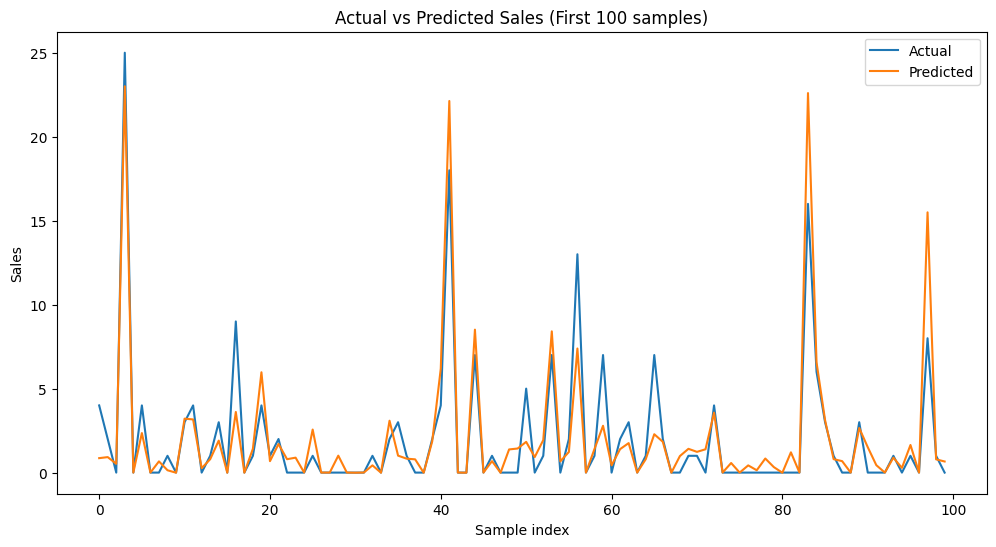

In [125]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_valid.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title('Actual vs Predicted Sales (First 100 samples)')
plt.xlabel('Sample index')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [127]:
historical_df = sell_prices__merged_lags.copy()

In [133]:
last_date = historical_df['date'].max()

In [135]:
base_df = historical_df[historical_df['date'] == last_date]

In [137]:
base_df['date'] = last_date + pd.Timedelta(days=1)

/var/folders/5j/21g__tmn49j37fc_6jm0546c0000gn/T/ipykernel_1693/3801190712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df['date'] = last_date + pd.Timedelta(days=1)


In [141]:
base_df['sales'] = np.nan

/var/folders/5j/21g__tmn49j37fc_6jm0546c0000gn/T/ipykernel_1693/1113274647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df['sales'] = np.nan


In [145]:
base_df['day_of_month'] = base_df['date'].dt.day
base_df['week_number'] = base_df['date'].dt.isocalendar().week
base_df['quarter'] = base_df['date'].dt.quarter
base_df['year'] = base_df['date'].dt.year
base_df['is_weekend'] = base_df['date'].dt.weekday >= 5


/var/folders/5j/21g__tmn49j37fc_6jm0546c0000gn/T/ipykernel_1693/2612051041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df['day_of_month'] = base_df['date'].dt.day
/var/folders/5j/21g__tmn49j37fc_6jm0546c0000gn/T/ipykernel_1693/2612051041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df['week_number'] = base_df['date'].dt.isocalendar().week
/var/folders/5j/21g__tmn49j37fc_6jm0546c0000gn/T/ipykernel_1693/2612051041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [155]:
week_row = calendar_df.loc[calendar_df['date'] == base_df['date'].iloc[0], 'wm_yr_wk']
if not week_row.empty:
    week_num = week_row.values[0]
else:
    week_num = historical_df['week_number'].max()
base_df['week_number'] = week_num


/var/folders/5j/21g__tmn49j37fc_6jm0546c0000gn/T/ipykernel_1693/908478301.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df['week_number'] = week_num


In [169]:
base_df = base_df.merge(
    sell_prices_df[['store_id', 'item_id', 'wm_yr_wk', 'sell_price']],
    left_on=['store_id', 'item_id', 'week_number'], right_on= ['store_id', 'item_id', 'wm_yr_wk'],
    how='left'
)
base_df['sell_price_y'].fillna(-1, inplace=True)


/var/folders/5j/21g__tmn49j37fc_6jm0546c0000gn/T/ipykernel_1693/3295310759.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base_df['sell_price_y'].fillna(-1, inplace=True)


In [171]:
for lag in [7, 28]:
    base_df[f'lag_{lag}'] = historical_df.groupby(['store_id', 'item_id'])['sales'].shift(lag).values[-len(base_df):]


In [173]:
for window in [7, 28]:
    base_df[f'Rolling_{window}'] = (
        historical_df.groupby(['store_id', 'item_id'])['sales']
        .transform(lambda x: x.shift(1).rolling(window).mean()).values[-len(base_df):]
    )


In [174]:
base_df['price_lag_7'] = historical_df.groupby(['store_id', 'item_id'])['sell_price'].shift(7).values[-len(base_df):]
base_df['price_change_flag'] = np.where(
    (base_df['sell_price'] != base_df['price_lag_7']) & (base_df['sell_price'] != -1) & (base_df['price_lag_7'] != -1),
    1, 0
)


In [177]:
feature_cols = [col for col in base_df.columns if col in X_train.columns]
X_future = base_df[feature_cols]


In [179]:
base_df['sales'] = lgbm_regressor.predict(X_future)


In [181]:
historical_df = pd.concat([historical_df, base_df], ignore_index=True)
